PassengerId	탑승자 데이터 일련번호 o
Survived	생존여부(0: 사망, 1: 생존) = o
Pclass		티켓선실등급(1: 일등석, 2: 이등석, 3: 삼등석) = o
Name		탑승자 이름 o
Sex		탑승자 성별 o
Age		탑승자 나이 o
SibSp		같이 탑승한 형제, 자매 or 배우자의 인원 수 o
Parch		같이 탑승한 부모님 or 어린이 인원 수 o
Ticket		티켓번호 x
Fare		요금 x
Cabin		선실번호 x
Embarked	중간정착항구(C : Cherbourg, Q : Queenstown, S = Sothampton) o

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
# 중복값 수
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [5]:
# 결측값 수
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# 한꺼번에 데이터 처리하기 위해
unit = pd.concat([train.drop('Survived', axis=1), test], axis=0)
ttu = [train, test, unit]

ttu

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [7]:
# 이름의 prefix 분포 확인
for dataset in ttu:
    dataset['Prefix'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

In [8]:
# prefix를 매핑
fix = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Mlle": 4, "Major": 4, "Col": 4,"Countess": 4,
                 "Capt": 4, "Ms": 4, "Sir": 4, "Lady": 4, "Mme" : 4, "Don": 4,"Jonkheer": 4}
for dataset in ttu:
    dataset.drop('Name', axis=1, inplace=True)
    dataset['Prefix'] = dataset['Prefix'].map(fix)
    dataset.set_index('PassengerId', inplace=True) # 인덱스 변경
    
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,4
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [9]:
# 각 prefix의 나이 평균으로 nan값 채우기
for dataset in ttu:
    dataset["Age"].fillna(unit.groupby("Prefix")["Age"].transform("mean"), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Prefix    891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [10]:
# 나이 분포비율 확인
unit['Age'].describe()

count    1309.000000
mean       29.907572
std        13.197885
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

In [11]:
# 사분위로 나눠서 카테고리화
for dataset in ttu:
    dataset['Age'] = pd.qcut(dataset['Age'], 4, labels=[0,1,2,3])
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1,0,3,male,1,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,female,3,1,0,PC 17599,71.2833,C85,C,2


In [12]:
# Sex 컬럼 매핑
for dataset in ttu:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 2}).astype(int)
    
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1,0,3,1,1,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,2,3,1,0,PC 17599,71.2833,C85,C,2


In [13]:
# Embarked 열의 NaN 값을 내 맘대로
train['Embarked'].fillna(value='S', inplace=True)
print(train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Prefix        0
dtype: int64


In [14]:
# 문자열을 숫자형으로 변환
em = {"S": 0, "C": 1, "Q": 2}
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].map(em)
test.loc[:, 'Embarked'] = test.loc[:, 'Embarked'].map(em)

train.head(2)

C:\Users\JOOYONKJ\AppData\Local\Temp\ipykernel_19600\32855870.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].map(em)
C:\Users\JOOYONKJ\AppData\Local\Temp\ipykernel_19600\32855870.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Embarked'] = test.loc[:, 'Embarked'].map(em)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1,0,3,1,1,1,0,A/5 21171,7.2500,NaN,0,0
2,1,1,2,3,1,0,PC 17599,71.2833,C85,1,2


In [15]:
# 불필요 행 삭제
for dataset in ttu:
    dataset.drop(columns = ['Ticket', 'Fare', 'Cabin'], inplace=True )
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Prefix
PassengerId,,,,,,,,
1,0,3,1,1,1,0,0,0
2,1,1,2,3,1,0,1,2


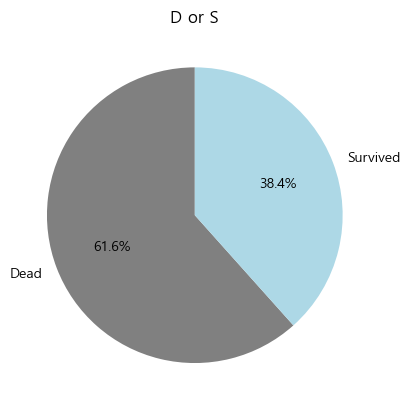

In [16]:
# 생존 사망 파이그래프
plt.rc('font', family='Malgun Gothic') # For windows

survived_counts = train['Survived'].value_counts()
plt.pie(survived_counts, labels=['Dead', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['gray', 'lightblue'])
plt.title('D or S')
plt.show()


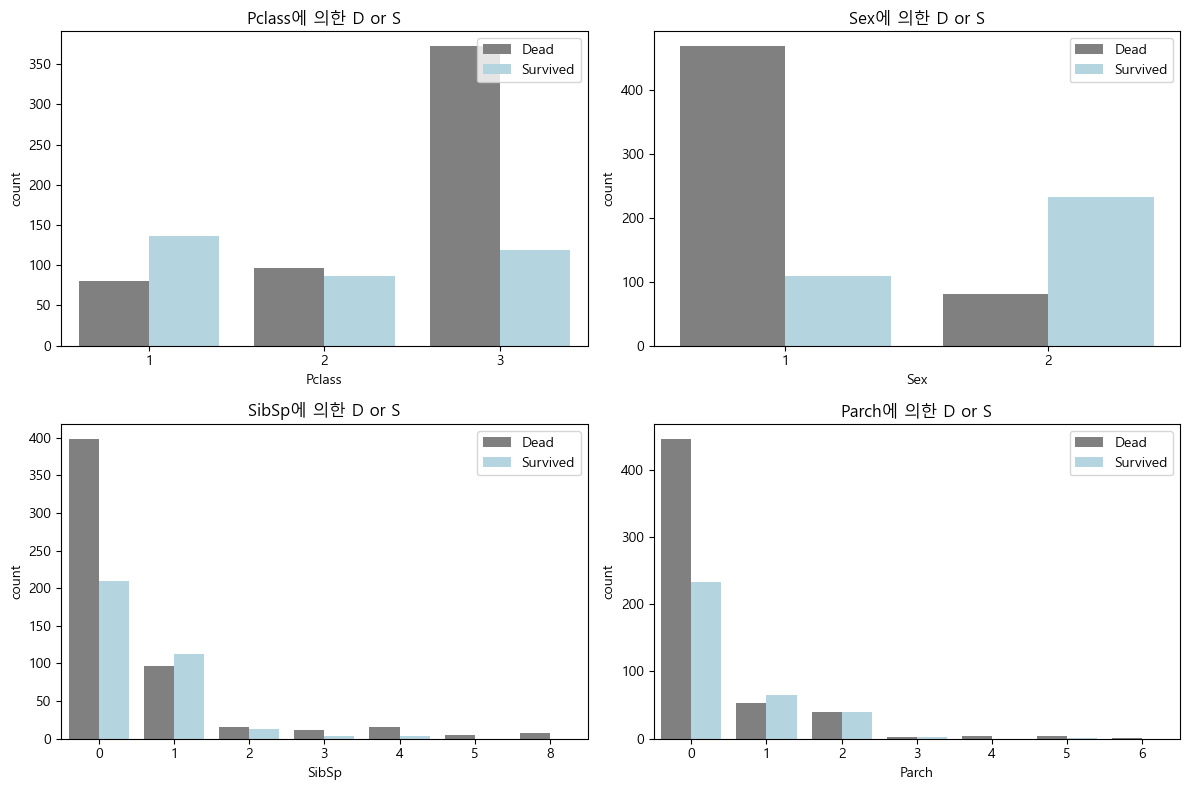

In [17]:
# 서브플롯 4면으로 시각화
col = ['Pclass', 'Sex', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))

for i, column in enumerate(col, 1):

    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='Survived', data=train, palette=['gray', 'lightblue'])
    
    plt.title(f'{column}에 의한 D or S')
    plt.xlabel(column)
    plt.legend(loc='upper right', labels=['Dead', 'Survived'])

plt.tight_layout()
plt.show()


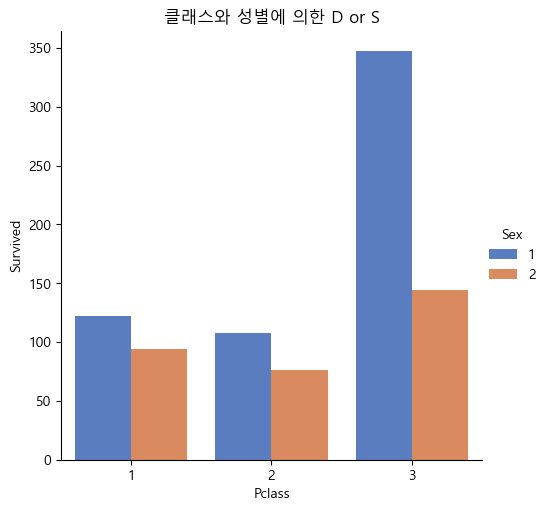

In [18]:
# Pclass와는 무관하게 여성이 우선시 구조
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=train, palette='muted', estimator=len)
plt.title('클래스와 성별에 의한 D or S')
plt.show()

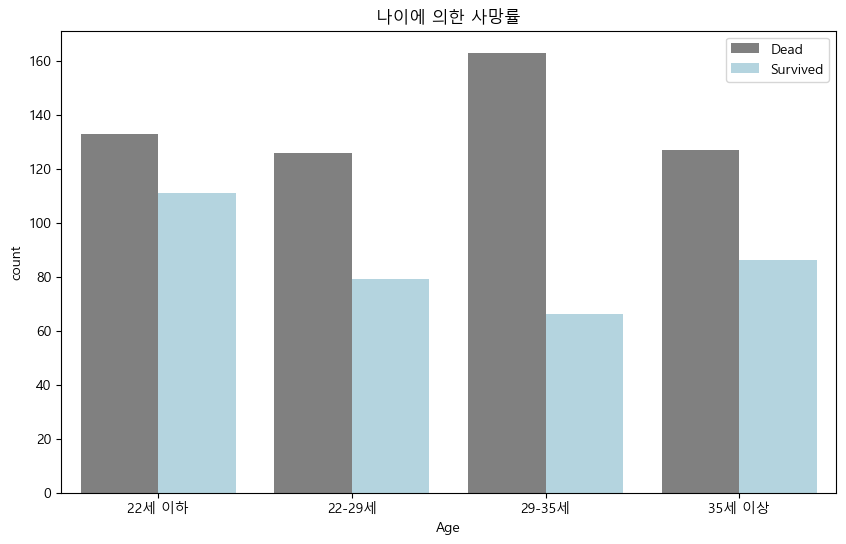

In [19]:
# 나이 분포도에 따른 사망률
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Survived', data=train, palette=['gray', 'lightblue'])
plt.title('나이에 의한 사망률')
plt.xlabel('Age')
plt.legend(loc='upper right', labels=['Dead', 'Survived'])
plt.xticks([0, 1, 2, 3], ['22세 이하', '22-29세', '29-35세', '35세 이상'])
plt.show()

In [20]:
label = train['Survived']
train.drop('Survived', axis=1, inplace=True)

train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Prefix
PassengerId,,,,,,,
1,3,1,1,1,0,0,0
2,1,2,3,1,0,1,2


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = train
y = label
knn = KNeighborsClassifier(n_neighbors=8)

# k-fold
scores = cross_val_score(knn, X, y, cv=5) 

print(f"교차검증 별 정확도 : {np.round(scores, 4)*100}")
print(f"평균 검증 정확도 : {np.round(np.mean(scores), 4)*100}")

교차검증 별 정확도 : [82.12 79.78 79.21 77.53 84.27]
평균 검증 정확도 : 80.58
